In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../datasets/used_cars.csv')

In [3]:
df.head()

,price,year,miles,doors,type
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car


In [4]:
df.price.describe()

count       14.000000
mean      6571.428571
std       6161.097376
min       1300.000000
25%       2125.000000
50%       3500.000000
75%       9375.000000
max      22000.000000
Name: price, dtype: float64

In [5]:
df.year.describe()

count      14.000000
mean     2004.857143
std         4.382784
min      1997.000000
25%      2003.000000
50%      2004.000000
75%      2008.500000
max      2012.000000
Name: year, dtype: float64

In [6]:
df.type.value_counts()

car      11
truck     3
Name: type, dtype: int64

In [7]:
df['is_car'] = df['type'].apply(lambda x: 1 if x=='car' else 0)
print df

    price  year   miles  doors   type  is_car
0   22000  2012   13000      2    car       1
1   14000  2010   30000      2    car       1
2   13000  2010   73500      4    car       1
3    9500  2009   78000      4    car       1
4    9000  2007   47000      4    car       1
5    4000  2006  124000      2    car       1
6    3000  2004  177000      4    car       1
7    2000  2004  209000      4  truck       0
8    3000  2003  138000      2    car       1
9    1900  2003  160000      4    car       1
10   2500  2003  190000      2  truck       0
11   5000  2001   62000      4    car       1
12   1800  1999  163000      2  truck       0
13   1300  1997  138000      4    car       1


In [8]:
x = df[['year', 'miles', 'doors', 'is_car']]
y = df.price

In [9]:
from sklearn.cross_validation import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.30)
print x_train.shape, y_train.shape, x_test.shape, y_test.shape

(9, 4) (9,) (5, 4) (5,)


In [11]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()

In [12]:
decision_tree.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [13]:
decision_tree.predict(x_train)

array([  3000.,  13000.,  14000.,   1300.,   9000.,   2000.,   2500.,
         9500.,   3000.])

In [14]:
y_train

8      3000
2     13000
1     14000
13     1300
4      9000
7      2000
10     2500
3      9500
6      3000
Name: price, dtype: int64

In [15]:
import matplotlib.pylab as plt
%matplotlib inline


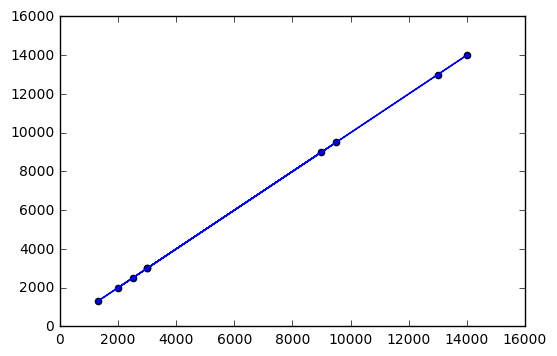

In [16]:
plt.scatter(y_train, decision_tree.predict(x_train))
plt.plot(y_train, y_train)

In [17]:
from sklearn.metrics import r2_score

In [18]:
r2_score(y_train, decision_tree.predict(x_train))

1.0

In [19]:
y_test

9      1900
11     5000
0     22000
12     1800
5      4000
Name: price, dtype: int64

In [20]:
decision_tree.predict(x_test)

array([  3000.,   9000.,  14000.,   1300.,   3000.])

(0, 25000)

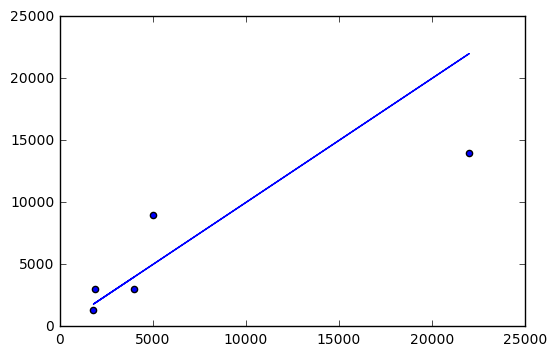

In [21]:
plt.scatter(y_test, decision_tree.predict(x_test))
plt.plot(y_test, y_test)
plt.ylim((0, 25000))
plt.xlim((0, 25000))

In [22]:
import numpy as np

In [23]:
def find_mse(y_true, y_pred):
    values = []
    for value in zip(y_true, y_pred):
        values.append((value[0]-value[1])**2)
    return np.mean(values)

In [24]:
find_mse(y_test, decision_tree.predict(x_test))

16492000.0

In [25]:
def make_pretty_plots(y_true, y_pred):
    plt.scatter(y_true, y_pred)
    plt.plot(y_true, y_true)
    plt.ylim((0, 25000))
    plt.xlim((0, 25000))
    plt.show()

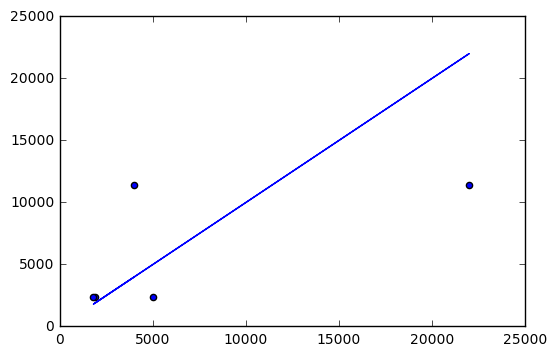

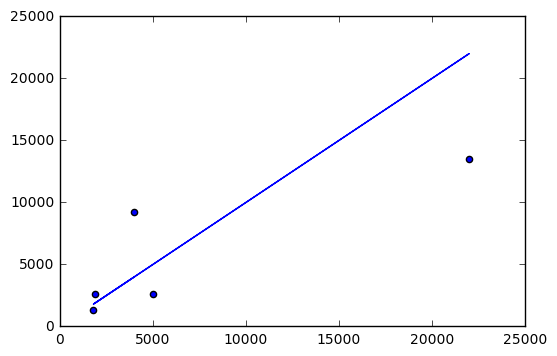

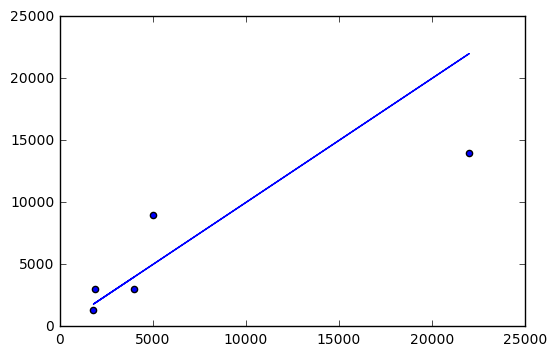

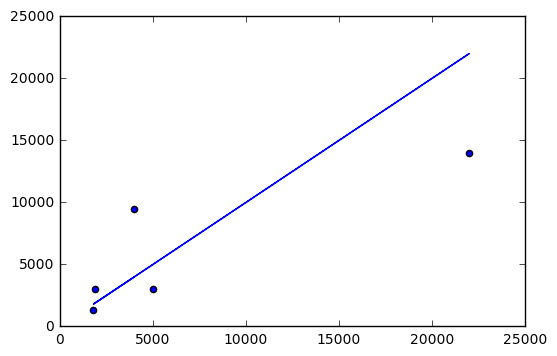

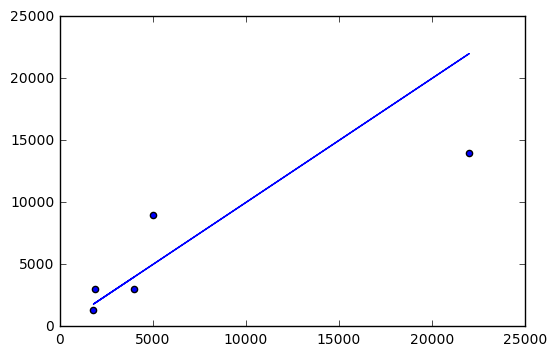

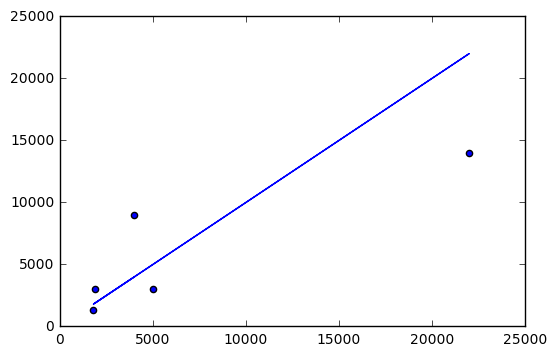

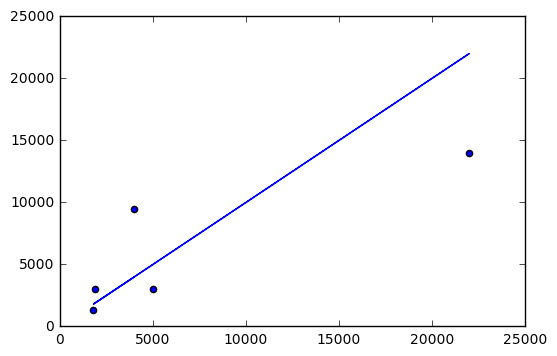

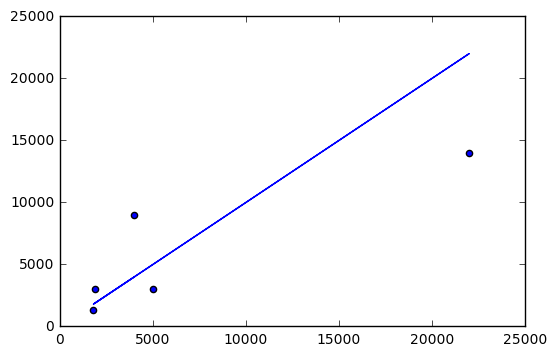

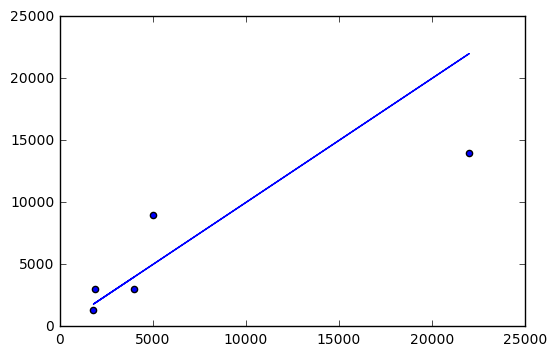

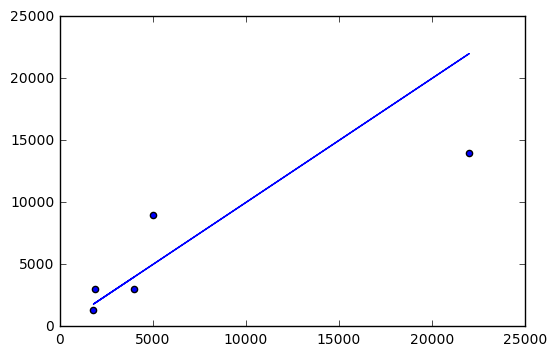

In [26]:
list_of_mse = []
for x in range(1, 11):
    new_decision_tree = DecisionTreeRegressor(max_depth=x)
    new_decision_tree.fit(x_train, y_train)
    predictions = new_decision_tree.predict(x_test)
    make_pretty_plots(y_test, predictions)
    mse = find_mse(y_test, predictions)
    list_of_mse.append(mse)

In [27]:
list_of_mse

[34955210.0,
 21245750.0,
 16492000.0,
 19942000.0,
 16492000.0,
 18892000.0,
 19942000.0,
 18892000.0,
 16492000.0,
 16492000.0]

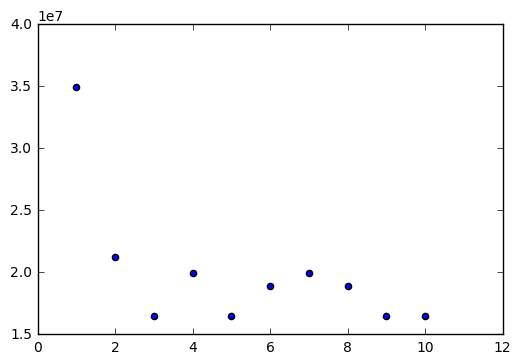

In [28]:
plt.scatter(range(1, 11), list_of_mse)

In [29]:
decision_tree.feature_importances_

array([ 0.09728871,  0.89960771,  0.00310359,  0.        ])

In [35]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot

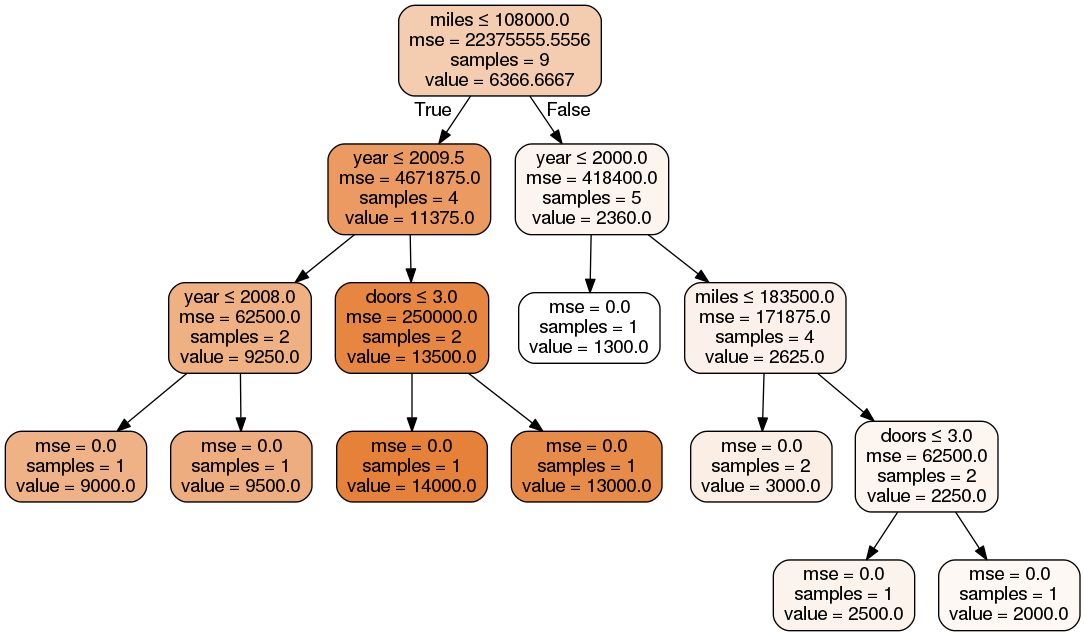

In [48]:
feature_names = ['year', 'miles', 'doors', 'is_car']
dot_data = StringIO()  
export_graphviz(decision_tree, 
                out_file=dot_data,  
                feature_names=feature_names,  
                filled=True, 
                rounded=True,  
                special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [37]:
from sklearn.grid_search import GridSearchCV

In [39]:
params = {
    'max_depth': [1, 2, 3, 4],
    'max_features': [1, 2, 3, 4],
    'max_leaf_nodes': [2, 3, 5]
}

In [44]:
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=params,
#     verbose=10
)
decision_function = DecisionTreeRegressor()
grid_search.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 3, 4], 'max_leaf_nodes': [2, 3, 5], 'max_depth': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [45]:
grid_search.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=2,
           max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [46]:
grid_search.best_score_

0.74237923436986675

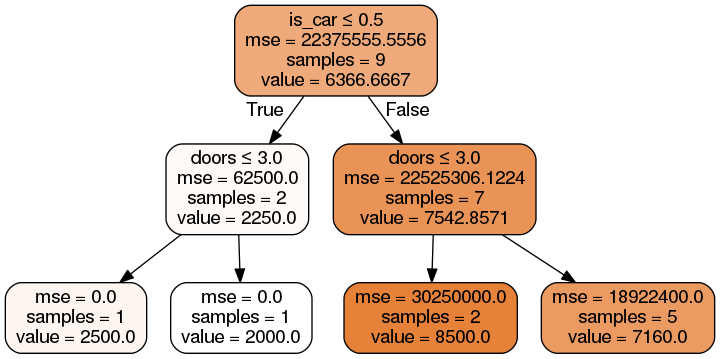

In [49]:
dot_data = StringIO()  
export_graphviz(grid_search.best_estimator_, 
                out_file=dot_data,  
                feature_names=feature_names,  
                filled=True, 
                rounded=True,  
                special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

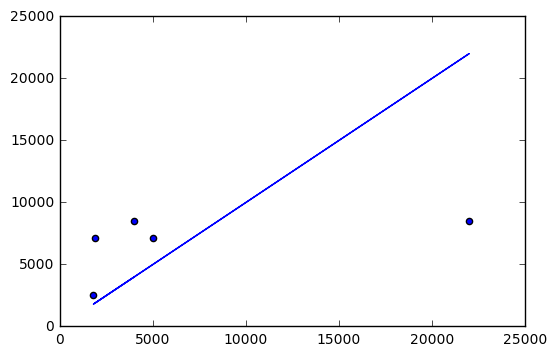

In [51]:
best_estimator = grid_search.best_estimator_
predictions = best_estimator.predict(x_test)
make_pretty_plots(y_test, predictions)